# Author: Gowtham B
# Project: Heart Disease Prediction using Random Forest & Cross-Validation
# Type: Individual Portfolio Project

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Set random seed for the reproducibility
np.random.seed(42)



## 1. Data Preparation
Loading the dataset from `heart_disease_dataset.csv`.


In [2]:

# Load dataset
try:
    df = pd.read_csv('heart_disease_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'heart_disease_dataset.csv' not found. Please ensure the file is in the same directory.")
    # Fallback or exit logic could go here, but for this demo ensuring file presence is key
    
print(f"Dataset Shape: {df.shape}")
df.head()


Dataset loaded successfully!
Dataset Shape: (400, 17)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,bmi,smoker,famhist,target
0,58,0,3,136,302,0,1,105,0,1.1,2,3,2,31.1,0,0,1
1,52,0,2,101,306,0,1,121,0,0.4,1,2,3,17.1,1,0,1
2,59,0,0,108,278,0,0,153,1,0.5,2,1,1,28.0,0,0,1
3,67,0,0,143,187,0,0,159,1,0.2,1,3,1,16.0,1,1,0
4,51,1,1,133,329,0,1,165,0,0.3,1,2,2,22.1,0,0,0



## 2. Exploratory Data Analysis (EDA)


In [3]:

# Check info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       400 non-null    int64  
 1   sex       400 non-null    int64  
 2   cp        400 non-null    int64  
 3   trestbps  400 non-null    int64  
 4   chol      400 non-null    int64  
 5   fbs       400 non-null    int64  
 6   restecg   400 non-null    int64  
 7   thalach   400 non-null    int64  
 8   exang     400 non-null    int64  
 9   oldpeak   400 non-null    float64
 10  slope     400 non-null    int64  
 11  ca        400 non-null    int64  
 12  thal      400 non-null    int64  
 13  bmi       400 non-null    float64
 14  smoker    400 non-null    int64  
 15  famhist   400 non-null    int64  
 16  target    400 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 53.3 KB


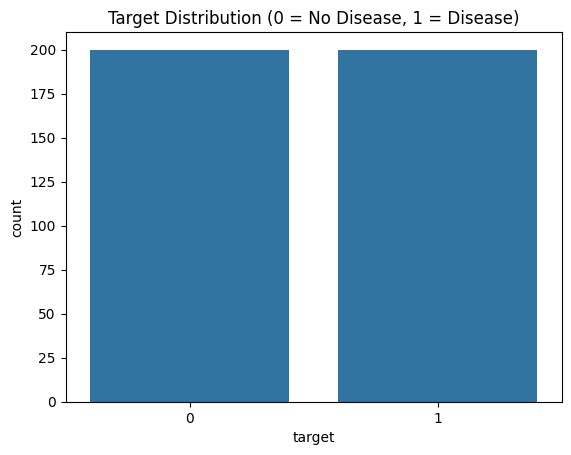

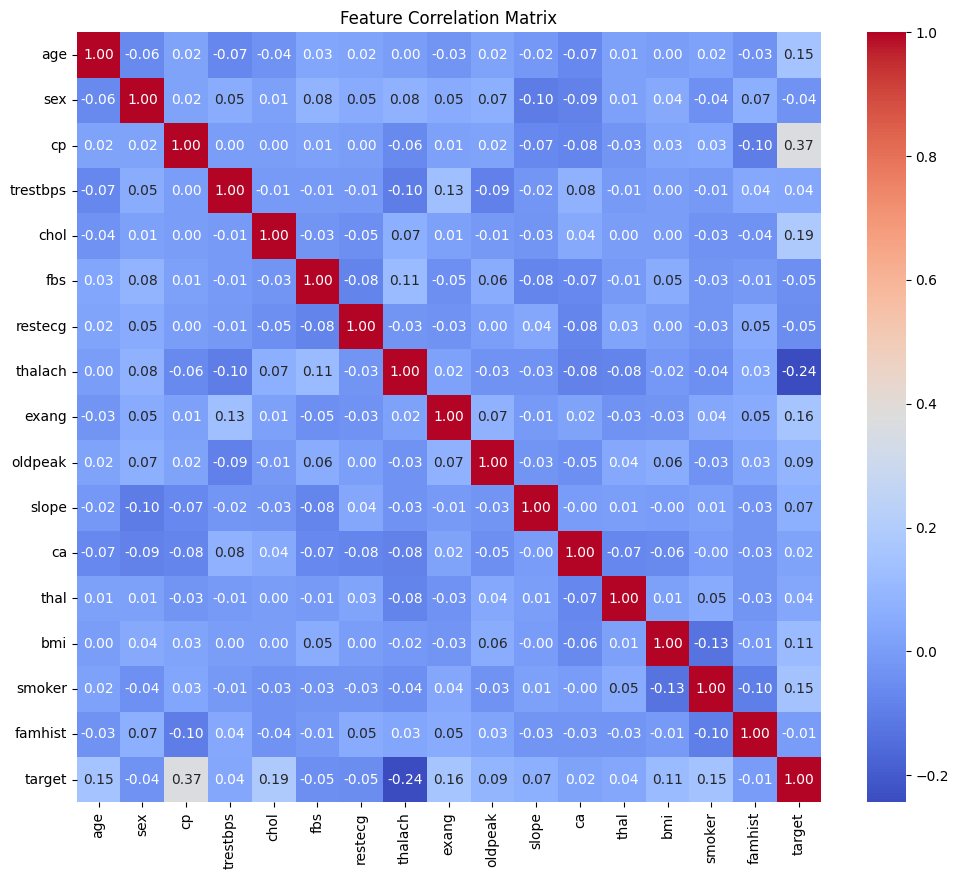

In [4]:

# Check distribution of target
sns.countplot(x='target', data=df)
plt.title('Target Distribution (0 = No Disease, 1 = Disease)')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [5]:

# Preprocessing: Scale numerical features
scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,bmi,smoker,famhist
0,0.499601,-0.985111,1.367663,0.208076,1.014999,-0.424195,-0.030110,-1.943657,-0.936981,0.051240,1.184450,1.268423,-0.080575,1.316959,-0.642983,-0.829315
1,-0.195093,-0.985111,0.460424,-1.922911,1.092580,-0.424195,-0.030110,-1.253805,-0.936981,-0.677039,-0.042959,0.382962,1.159034,-2.181272,1.555250,-0.829315
2,0.615384,-0.985111,-1.354055,-1.496714,0.549514,-0.424195,-1.234514,0.125898,1.067257,-0.572999,1.184450,-0.502499,-1.320183,0.542351,-0.642983,-0.829315
3,1.541644,-0.985111,-1.354055,0.634273,-1.215448,-0.424195,-1.234514,0.384592,1.067257,-0.885118,-0.042959,1.268423,-1.320183,-2.456133,1.555250,1.205814
4,-0.310876,1.015114,-0.446815,0.025420,1.538669,-0.424195,-0.030110,0.643287,-0.936981,-0.781079,-0.042959,0.382962,-0.080575,-0.931904,-0.642983,-0.829315



## 3. Cross-Validation Implementation
We will demonstrate both K-Fold and Stratified K-Fold cross-validation.


In [6]:

# Initialize Models
rf = RandomForestClassifier(random_state=42)

# K-Fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf_scores = cross_val_score(rf, X_scaled, y, cv=kf, scoring='accuracy')

print(f"K-Fold CV Accuracy Scores: {kf_scores}")
print(f"Mean K-Fold Accuracy: {kf_scores.mean():.4f}")

# Stratified K-Fold CV (Better for classification)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_scores = cross_val_score(rf, X_scaled, y, cv=skf, scoring='accuracy')

print(f"Stratified K-Fold CV Accuracy Scores: {skf_scores}")
print(f"Mean Stratified K-Fold Accuracy: {skf_scores.mean():.4f}")


K-Fold CV Accuracy Scores: [0.8   0.675 0.625 0.525 0.7   0.675 0.6   0.65  0.675 0.7  ]
Mean K-Fold Accuracy: 0.6625
Stratified K-Fold CV Accuracy Scores: [0.8   0.525 0.725 0.675 0.725 0.725 0.625 0.725 0.75  0.65 ]
Mean Stratified K-Fold Accuracy: 0.6925



## 4. Hyperparameter Tuning for Random Forest
Using GridSearchCV to find the optimal parameters.


In [7]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_scaled, y)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.7100



## 5. Model Comparison
Comparing Random Forest (Tuned) with SVM and Decision Tree.


In [8]:

# Define models
models = {
    "Random Forest (Tuned)": best_rf,
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)

}

results = []

for name, model in models.items():
    res = {}
    res['Model'] = name
    
    # Perform Cross-Validation with multiple metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results = cross_validate(model, X_scaled, y, cv=10, scoring=scoring)
    
    res['Accuracy'] = cv_results['test_accuracy'].mean()
    res['Precision'] = cv_results['test_precision'].mean()
    res['Recall'] = cv_results['test_recall'].mean()
    res['F1 Score'] = cv_results['test_f1'].mean()
    
    results.append(res)

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (Tuned),0.6925,0.705369,0.67,0.683110
1,SVM,0.7225,0.748399,0.68,0.709419
2,Decision Tree,0.5925,0.597324,0.60,0.594268



## 6. Performance Evaluation Report


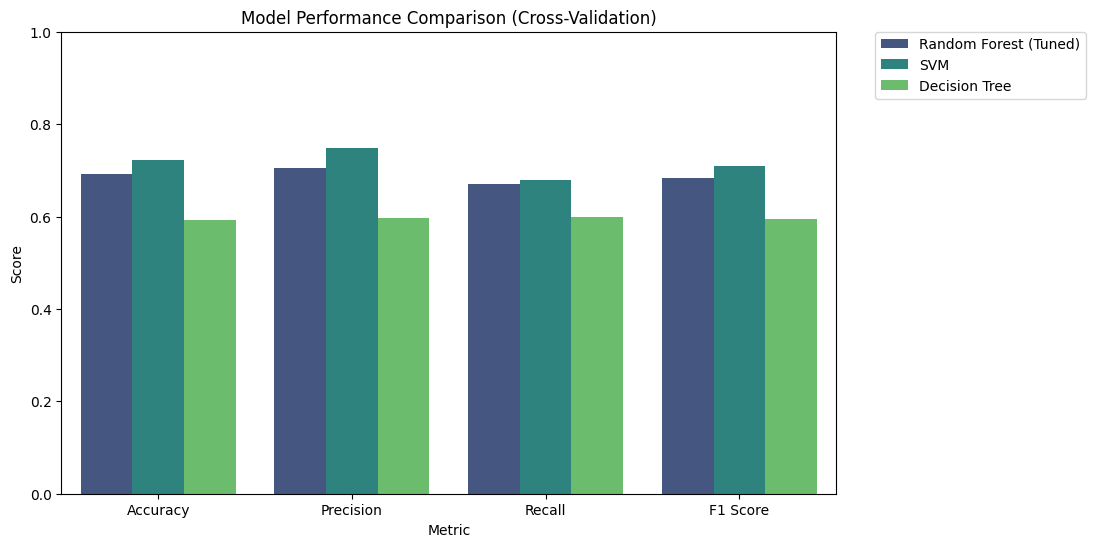

Detailed Comparison Table:
                   Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest (Tuned)    0.6925   0.705369    0.67  0.683110
1                    SVM    0.7225   0.748399    0.68  0.709419
2          Decision Tree    0.5925   0.597324    0.60  0.594268


In [9]:

# Melt dataframe for plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=results_melted, palette="viridis")
plt.title("Model Performance Comparison (Cross-Validation)")
plt.ylim(0, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("Detailed Comparison Table:")
print(results_df)
